### EDA

#### 20240726_Rockhead_Seoul(False_coordinate_sys).csv

#### columns info

- 앞으로 추가될 comlumns
    - 지질 시대
    - DEM 경사
    - 지형 정보(강, 산 ...)


|column name|Description|test input|
|---|---|---|
|borehole_code|시추공 코드|X|
|x|위도|O|
|y|경도|O|
|Elevation|표고|O|
|depth_start|rockhead 시작 심도|output|
|depth_end|rockhead 종료 심도|X|
|Ground name|지반명- WR: 풍화암, SR: 연암, MR: 보통암, HR: 경암|X|
|Density|1km^2당 시추공 밀도|O|

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#data load
csv = pd.read_csv('data/20240726_Rockhead_Seoul(False_coordinate_sys).csv')
df_row = pd.DataFrame(csv)

#### Data check
- info
- distribution

In [3]:
df_row.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20369 entries, 0 to 20368
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   borehole_code  20369 non-null  int64  
 1   x              20369 non-null  float64
 2   y              20369 non-null  float64
 3   elevation      20369 non-null  float64
 4   depth_start    20369 non-null  float64
 5   depth_end      20369 non-null  float64
 6   Ground name    20369 non-null  object 
 7   Density        20369 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.2+ MB


In [17]:
df_row['Ground name'].unique()

array(['WR', 'SR', 'MR', 'HR'], dtype=object)

In [18]:
df_row.describe().T

,count,mean,std,min,25%,50%,75%,max
borehole_code,20369.0,6.037609e+06,683672.840925,5.001001e+06,5.433014e+06,5.907016e+06,6.616013e+06,7.294012e+06
x,20369.0,1.993578e+05,8108.487462,1.808409e+05,1.924573e+05,2.010031e+05,2.052158e+05,2.155179e+05
y,20369.0,4.492516e+05,5398.934192,4.370737e+05,4.449383e+05,4.487764e+05,4.524415e+05,4.659430e+05
elevation,20369.0,3.791325e+01,40.111497,0.000000e+00,1.002000e+01,2.149000e+01,5.082000e+01,2.120000e+02
depth_start,20369.0,1.075738e+01,7.291503,0.000000e+00,5.000000e+00,9.900000e+00,1.560000e+01,1.020000e+02
depth_end,20369.0,1.549165e+01,8.794397,3.000000e-01,8.500000e+00,1.470000e+01,2.100000e+01,7.240000e+01
Density,20369.0,6.177680e-05,0.000034,3.000000e-07,3.700000e-05,5.570000e-05,8.060000e-05,1.621000e-04


In [4]:
#error값 제거
df_row['depth_fault']=df_row['depth_start'] > df_row['depth_end']
df_row['depth_fault'].value_counts()

depth_fault
False    20359
True        10
Name: count, dtype: int64

In [5]:
df = df_row[df_row['depth_fault']==False]

df.drop(['depth_fault'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20359 entries, 0 to 20368
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   borehole_code  20359 non-null  int64  
 1   x              20359 non-null  float64
 2   y              20359 non-null  float64
 3   elevation      20359 non-null  float64
 4   depth_start    20359 non-null  float64
 5   depth_end      20359 non-null  float64
 6   Ground name    20359 non-null  object 
 7   Density        20359 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.4+ MB


C:\Users\user\AppData\Local\Temp\ipykernel_29856\1409914588.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['depth_fault'], axis=1, inplace=True)


#### Data Visualization

In [6]:
import utils.eda_utils as eda_utils 

In [22]:
df_v = df.copy()

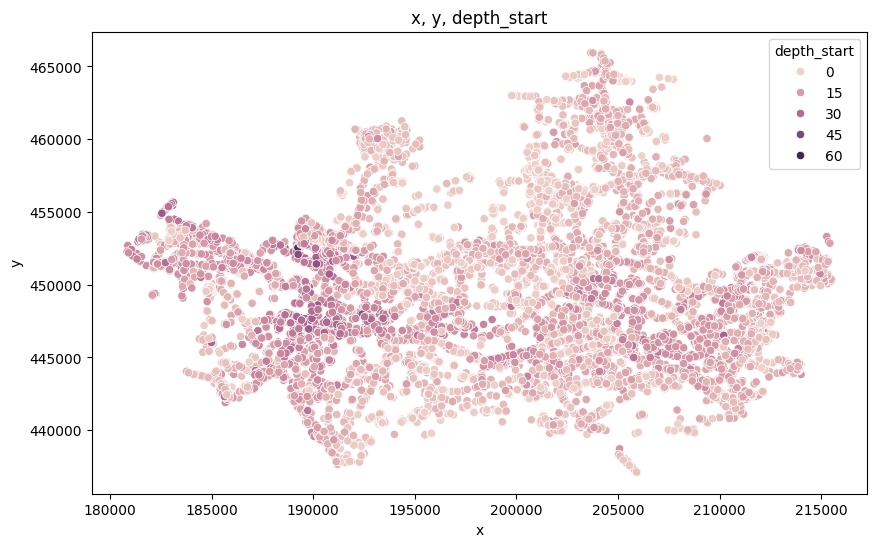

In [23]:
eda_utils.scatter_relation(df_v, 'x', 'y', 'x, y, depth_start','depth_start')

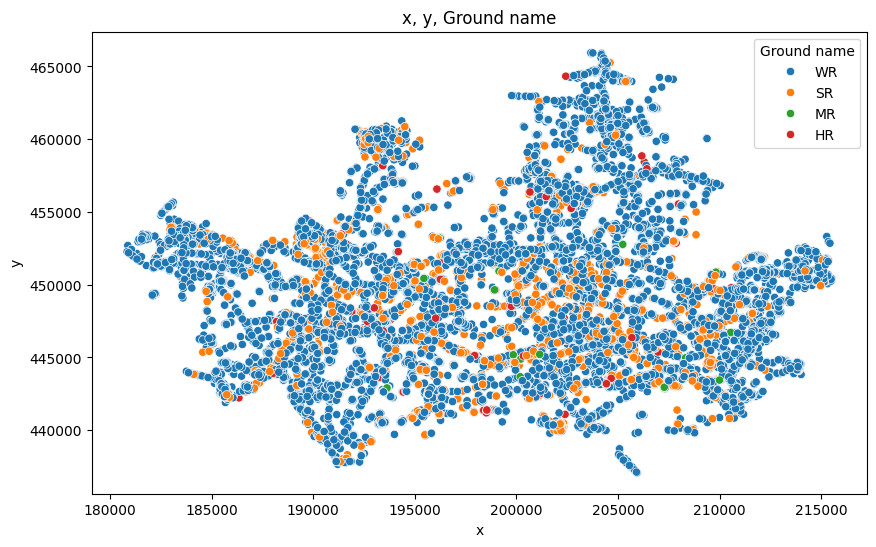

In [24]:
eda_utils.scatter_relation(df_v, 'x', 'y', 'x, y, Ground name','Ground name')

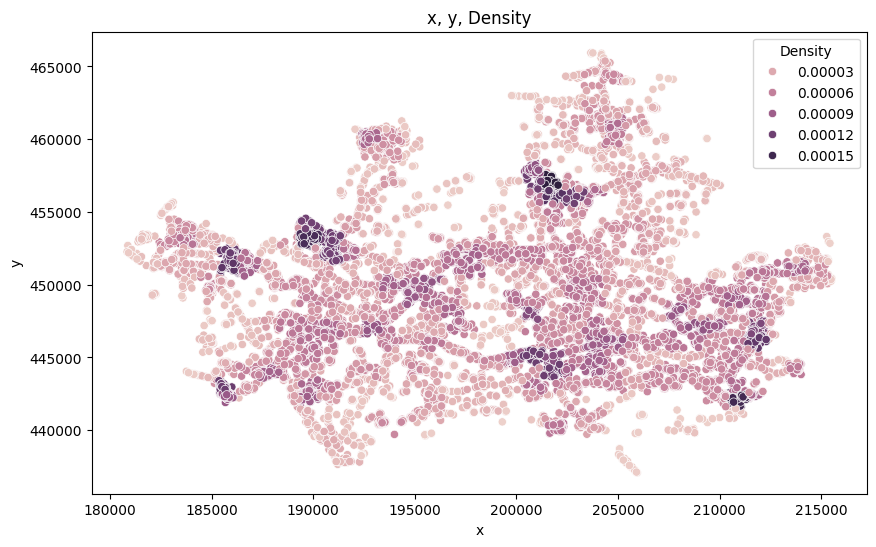

In [34]:
eda_utils.scatter_relation(df_v, 'x', 'y', 'x, y, Density','Density')

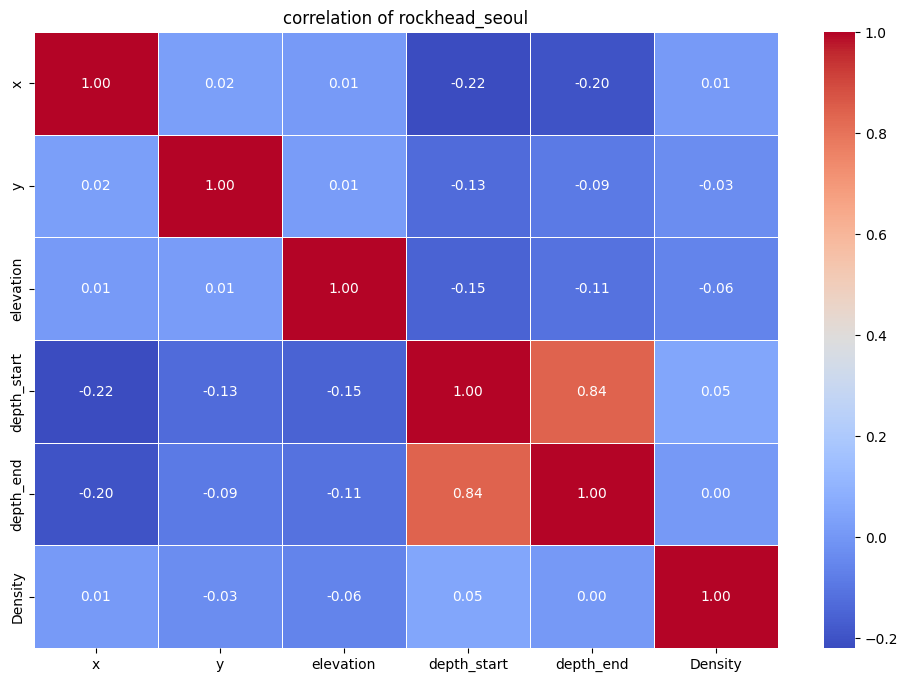

In [25]:
eda_utils.correlation_matrix(df_v, 'correlation of rockhead_seoul', drop_column='borehole_code')

<Figure size 1000x1000 with 0 Axes>

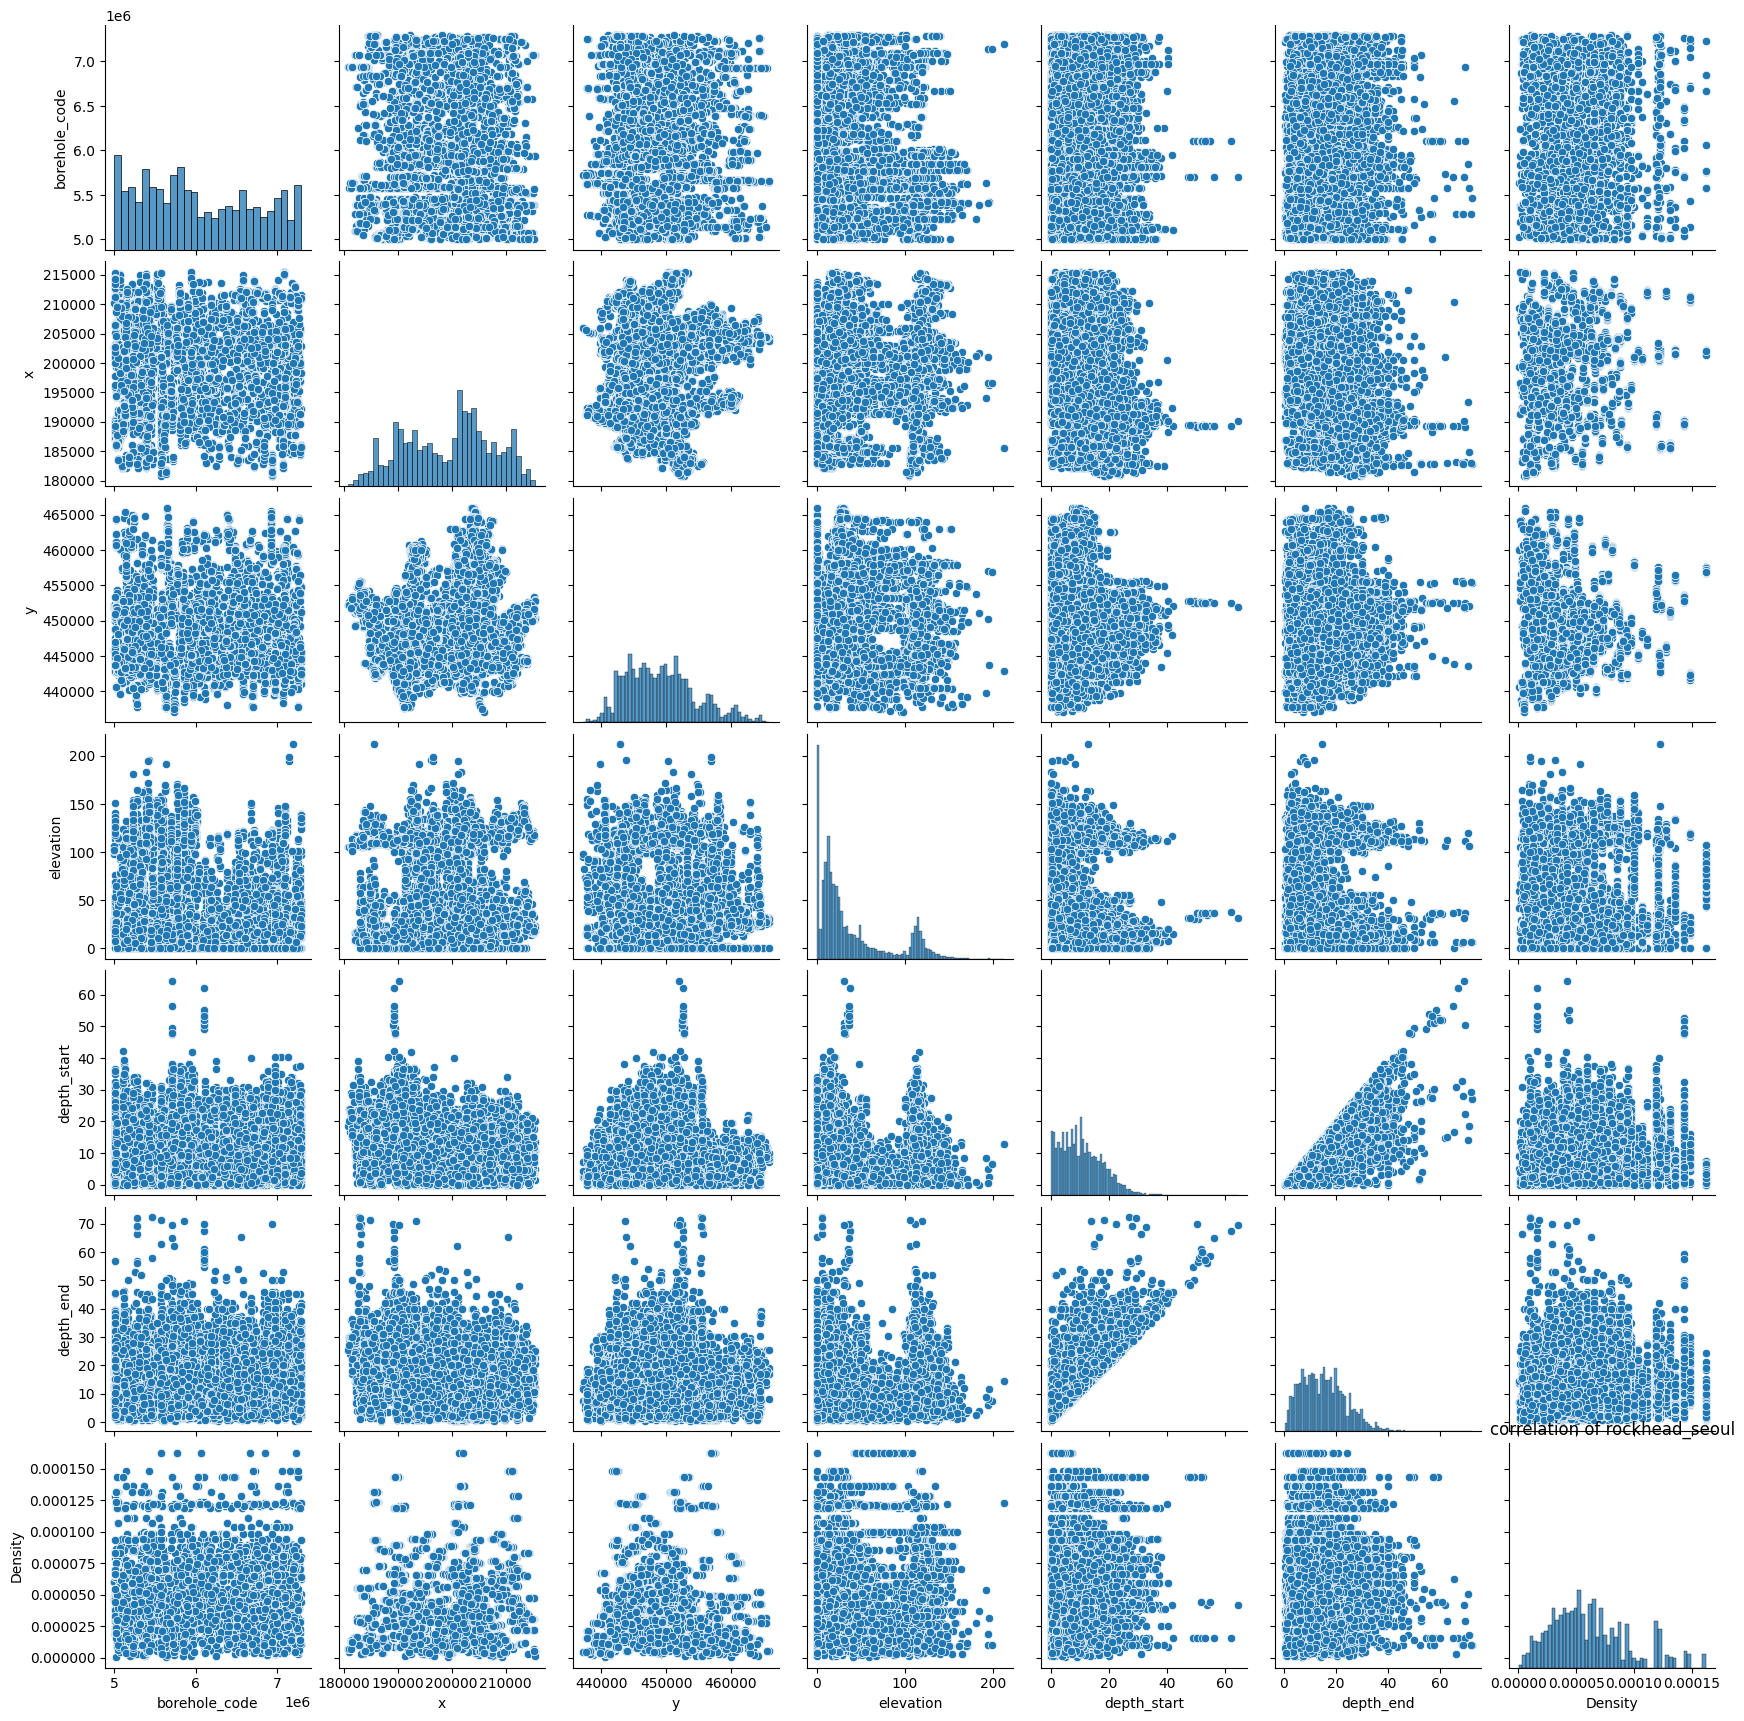

In [26]:
eda_utils.pairplot(df_v, 'correlation of rockhead_seoul', drop_column='borehole_code')

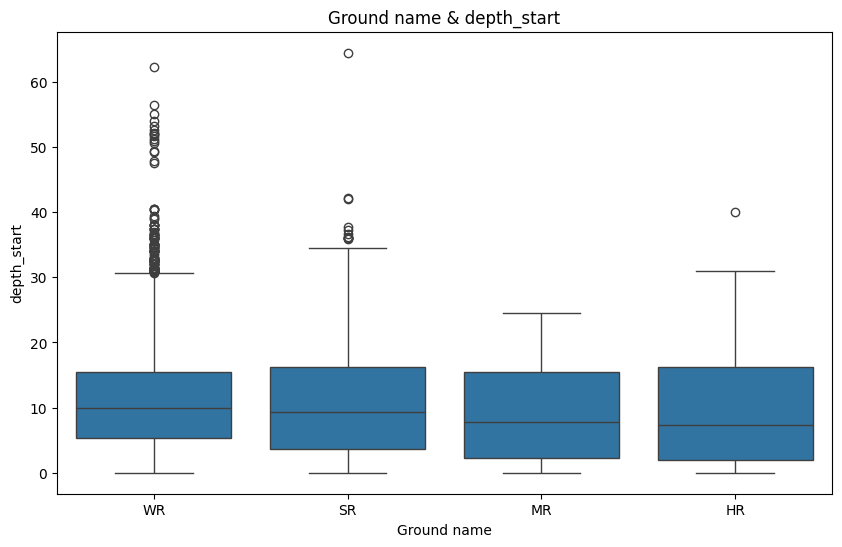

In [27]:
eda_utils.box_plot(df_v, 'Ground name', 'depth_start', 'Ground name & depth_start')

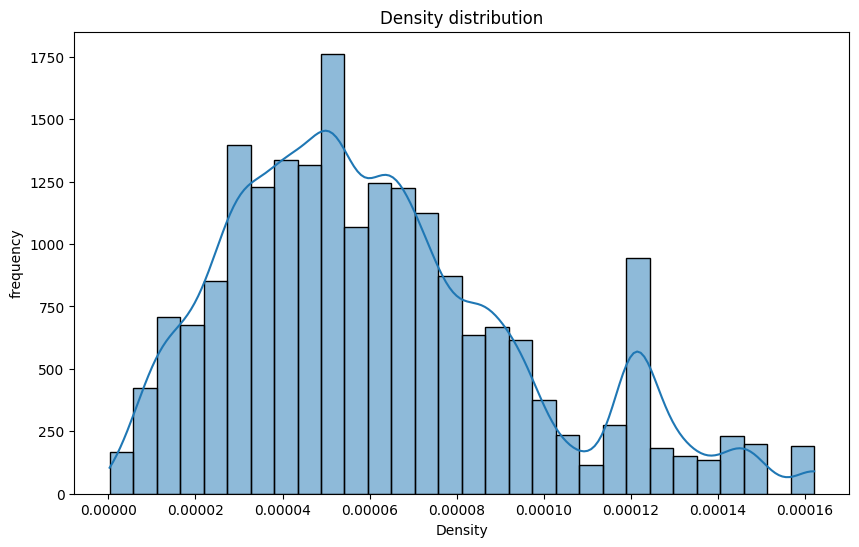

In [33]:
#depth distribution
eda_utils.distribution_histogram(df_v, 'Density', 'Density distribution')

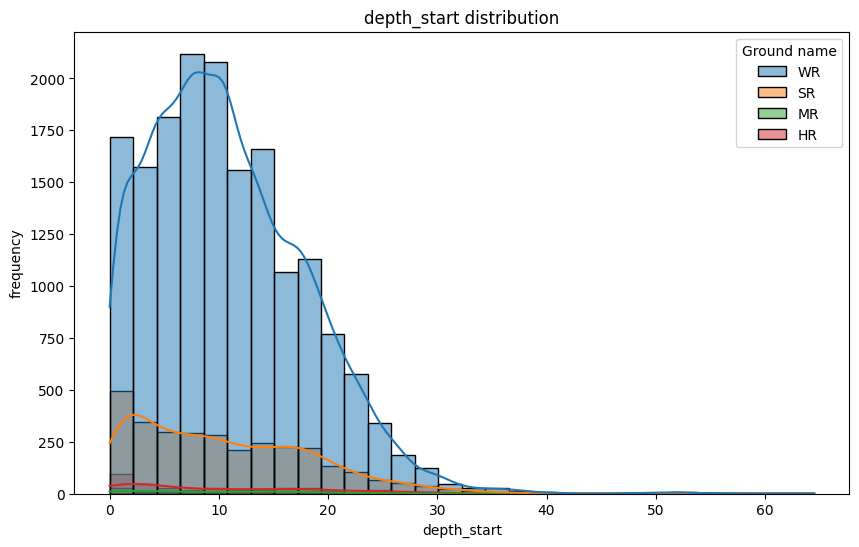

C:\Users\user\AppData\Local\Temp\ipykernel_3552\4183461730.py:4: RuntimeWarning: divide by zero encountered in log
  df_v['log_depth_start'] = pd.Series(np.log(df_v['depth_start'].to_numpy()))


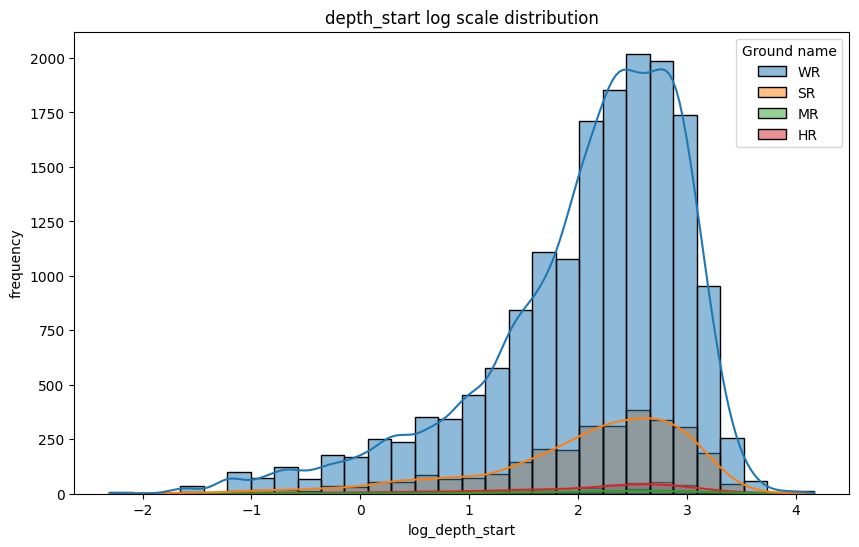

In [28]:
#elevation log scale distribution
eda_utils.distribution_histogram(df_v, 'depth_start', 'depth_start distribution', 'Ground name')

df_v['log_depth_start'] = pd.Series(np.log(df_v['depth_start'].to_numpy()))
eda_utils.distribution_histogram(df_v, 'log_depth_start', 'depth_start log scale distribution', 'Ground name')

#### Data Cleansing
- delete: depth end, borehole_code
- replace: ground name
- normalization: x, y, elevation, density

In [7]:
# replace

def df_cleansing(df):

    # delete
    df = df.drop('depth_end', axis=1)
    df = df.drop('borehole_code', axis=1)

    # replace
    ground_name_map = {'WR':0, 'SR': 1, 'MR': 2, 'HR': 3}
    df['Ground name'] = df['Ground name'].map(ground_name_map)

    # normalize
    x_mean, x_std = df['x'].mean(), df['x'].std()
    y_mean, y_std = df['y'].mean(), df['y'].std()
    elevation_mean, elevation_std = df['elevation'].mean(), df['elevation'].std()
    density_mean, density_std = df['Density'].mean(), df['Density'].std()

    df['x'] = (df['x']-x_mean)/x_std
    df['y'] = (df['y']-y_mean)/y_std
    df['elevation'] = (df['elevation']-elevation_mean)/elevation_std
    df['Density'] = (df['Density']-density_mean)/density_std

    return df

In [8]:
df_c = df_cleansing(df)

In [9]:
df_c.head()

,x,y,elevation,depth_start,Ground name,Density
0,-0.070531,1.089112,2.301422,0.8,0,-1.533692
1,0.379197,0.106907,-0.541499,10.5,1,0.342504
2,-1.042622,-0.550968,-0.945352,8.9,0,0.108710
3,-0.813593,0.036482,-0.855856,2.9,0,-0.975509
4,-0.263601,0.437519,-0.262293,2.5,0,0.272366


In [115]:
df_c.to_csv('data/240822_Rockhead_Seoul(False_coordinate_sys, pre-processed).csv', index=False)

In [116]:
den_min = df_c['Density'].min()
den_max = df_c['Density'].max()

den_gap = (den_max-den_min)/30

df_s = df_c.reset_index().copy()

df_s['den_bin'] = (df_s['Density']-den_min)//den_gap

df_s

,index,x,y,elevation,depth_start,Ground name,Density,den_bin
0,0,-0.070531,1.089112,2.301422,0.8,0,-1.533692,1.0
1,1,0.379197,0.106907,-0.541499,10.5,1,0.342504,13.0
2,2,-1.042622,-0.550968,-0.945352,8.9,0,0.108710,12.0
3,3,-0.813593,0.036482,-0.855856,2.9,0,-0.975509,5.0
4,4,-0.263601,0.437519,-0.262293,2.5,0,0.272366,13.0
...,...,...,...,...,...,...,...,...
20354,20364,-0.658865,-0.264789,1.785388,23.7,0,-0.294584,9.0
20355,20365,-1.483863,-1.009903,-0.668638,22.6,0,-0.133851,10.0
20356,20366,0.457619,1.361045,-0.157590,2.9,0,-0.364722,9.0
20357,20367,-0.458290,-0.569094,-0.778326,9.3,0,0.117478,12.0


In [117]:
df_s.groupby('den_bin').count()

,index,x,y,elevation,depth_start,Ground name,Density
den_bin,,,,,,,
0.0,169,169,169,169,169,169,169
1.0,422,422,422,422,422,422,422
2.0,708,708,708,708,708,708,708
3.0,675,675,675,675,675,675,675
4.0,850,850,850,850,850,850,850
5.0,1398,1398,1398,1398,1398,1398,1398
6.0,1229,1229,1229,1229,1229,1229,1229
7.0,1338,1338,1338,1338,1338,1338,1338
8.0,1317,1317,1317,1317,1317,1317,1317


In [118]:
df_test = pd.DataFrame(columns=df_s.columns)

for i in range(0,31):
    df_t_i = (df_s[df_s['den_bin'] == i]).sample(frac=0.2)

    df_test = pd.concat([df_test, df_t_i])

print(df_test.info())
df_test

<class 'pandas.core.frame.DataFrame'>
Index: 4074 entries, 3938 to 4358
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        4074 non-null   object 
 1   x            4074 non-null   float64
 2   y            4074 non-null   float64
 3   elevation    4074 non-null   float64
 4   depth_start  4074 non-null   float64
 5   Ground name  4074 non-null   object 
 6   Density      4074 non-null   float64
 7   den_bin      4074 non-null   float64
dtypes: float64(6), object(2)
memory usage: 286.5+ KB
None


C:\Users\user\AppData\Local\Temp\ipykernel_29856\2680288568.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test = pd.concat([df_test, df_t_i])


,index,x,y,elevation,depth_start,Ground name,Density,den_bin
3938,3941,0.836190,-1.513719,0.338500,18.0,0,-1.688580,0.0
4981,4984,0.705554,-1.947651,0.199645,15.0,0,-1.744106,0.0
3711,3714,-1.951190,-0.003060,-0.203709,17.7,0,-1.714882,0.0
13331,13338,0.002867,1.310252,2.350532,1.3,0,-1.700270,0.0
19625,19634,-1.797201,-0.197735,-0.306417,4.9,0,-1.682735,0.0
...,...,...,...,...,...,...,...,...
6665,6670,0.327095,1.396625,0.936301,3.5,0,2.931772,30.0
3154,3157,0.317666,1.398175,0.860516,1.1,0,2.931772,30.0
4900,4903,0.274709,1.469935,1.393003,2.0,0,2.931772,30.0
10084,10090,0.248832,1.524820,1.497706,0.6,0,2.931772,30.0


In [119]:
df_train = pd.merge(df_s, df_test, how='outer', indicator=True)
df_train = df_train.query('_merge == "left_only"').drop(columns=['_merge'])
df_train

,index,x,y,elevation,depth_start,Ground name,Density,den_bin
1,1,0.379197,0.106907,-0.541499,10.5,1,0.342504,13.0
2,2,-1.042622,-0.550968,-0.945352,8.9,0,0.108710,12.0
3,3,-0.813593,0.036482,-0.855856,2.9,0,-0.975509,5.0
5,5,0.200162,1.547265,1.637558,2.7,1,1.108180,18.0
6,6,-1.583346,0.437806,-0.744423,17.8,0,0.316203,13.0
...,...,...,...,...,...,...,...,...
20354,20364,-0.658865,-0.264789,1.785388,23.7,0,-0.294584,9.0
20355,20365,-1.483863,-1.009903,-0.668638,22.6,0,-0.133851,10.0
20356,20366,0.457619,1.361045,-0.157590,2.9,0,-0.364722,9.0
20357,20367,-0.458290,-0.569094,-0.778326,9.3,0,0.117478,12.0


In [121]:
df_train.drop('index',axis=1).to_csv('data/240822_Rockhead_Seoul_train.csv', index=False)
df_test.drop('index',axis=1).to_csv('data/240822_Rockhead_Seoul_test.csv', index=False)